In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,
    n_features=2,n_targets=1,
    noise=3.0)

In [4]:
X

array([[ 1.27895291, -0.03879701],
       [ 1.08681922, -1.47190636],
       [ 0.80514203, -0.44922703],
       ...,
       [ 0.36824636,  1.50444099],
       [-0.40974529,  0.0428093 ],
       [ 1.03553502, -1.17962317]])

In [5]:
y

array([ 9.48632808e+01, -4.88633212e+01,  1.43675216e+01,  1.51312011e+02,
       -8.82563300e+01,  1.95781066e+01, -1.17254181e+01, -9.04253690e+01,
        2.61895401e+02, -1.02351026e+02,  2.62577392e+01,  2.19538095e+02,
       -9.54922372e+01,  2.30022225e+02, -3.88048333e+01, -3.10032197e+01,
       -1.76789372e+02, -1.18231770e+02, -1.27426557e+00,  2.75616226e+01,
        3.60877117e+01,  9.16045346e+01,  2.81632020e+01,  6.20109404e+01,
        5.73337676e+01, -1.64349096e+02,  8.71339689e+01,  2.74813107e+01,
        7.42159690e+01,  1.24505152e+02, -1.30638369e+02, -1.32137097e+02,
       -3.76832872e+01,  4.67054355e+01,  3.20884914e+01, -4.28410639e+01,
        3.99777018e+01,  8.02111292e+01, -5.98175412e+01, -1.25492057e+02,
       -1.05748164e+02, -7.86350701e-01, -6.03153494e+01,  2.43096548e+01,
       -1.28805174e+01,  1.81298908e+01,  1.73256301e+02, -2.99383190e+00,
        6.01458383e+00,  1.36743155e+02,  1.52715443e+02,  2.03216910e+01,
       -9.27239720e+01, -

In [6]:
pd.DataFrame(X)[0]

0      1.278953
1      1.086819
2      0.805142
3      1.366520
4      0.182663
         ...   
995    0.160331
996    0.154579
997    0.368246
998   -0.409745
999    1.035535
Name: 0, Length: 1000, dtype: float64

In [7]:
pd.DataFrame(X)

,0,1
0,1.278953,-0.038797
1,1.086819,-1.471906
2,0.805142,-0.449227
3,1.366520,0.482220
4,0.182663,-1.053990
...,...,...
995,0.160331,-0.491591
996,0.154579,-0.152040
997,0.368246,1.504441
998,-0.409745,0.042809


<Axes: xlabel='0', ylabel='1'>

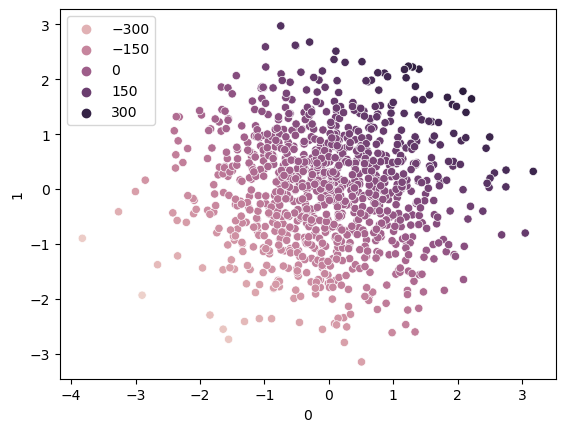

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[77.14433781, 91.57736825]])

In [14]:
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([ -18.73672714,   -9.8436575 ,  -13.34821515,  -32.24953755,
         53.92808478,  -31.57322317,  -24.60514273,  -31.91806831,
        213.96637817,  -69.58985859,  226.85972853,  -42.25517662,
        205.85923403,   34.04745394, -139.14911527,   55.56621468,
        128.7379804 , -123.46938458, -150.0588754 , -360.24064915,
        290.0912371 ,  -11.70114792,   50.28898128,  -84.62574796,
        -53.41419829, -175.98284841,  216.5310105 ,  -99.22962533,
        -30.39015189,  101.98263922,  168.23159813,   92.62209103,
         14.21873982, -197.13552982,  104.79267916,   59.77360393,
        243.98959519,  161.97829065, -121.82930583,  -97.84320109,
        256.55370376, -242.16759479,   24.5106267 , -217.47729002,
        -91.77973285,   39.68374843, -352.43326253, -134.87361004,
        -77.33997834,  151.61543542,   31.82373358,   -9.82719311,
        -94.21651417,  -31.27652484,  107.47387785,   77.71201015,
       -110.20831714,  -19.56588259,   49.50751667,   27.52453

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.9993584070463764


# Hyperparameter Tuning with SVR

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# define parameter range
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'epsilon':[0.1,0.2,0.3]}

In [22]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.065 total time=   0.0s
[CV 2/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.074 total time=   0.0s
[CV 3/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.038 total time=   0.0s
[CV 4/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.084 total time=   0.0s
[CV 5/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.060 total time=   0.0s
[CV 1/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.078 total time=   0.0s
[CV 2/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.079 total time=   0.0s
[CV 3/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.047 total time=   0.0s
[CV 4/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.088 total time=   0.0s
[CV 5/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.067 total time=   0.0s
[CV 1/5] END ....C=0.1, epsilon=0.1, gamma=0.01;, score=0.012 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [24]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 0.001}

In [25]:
y_predg=grid.predict(X_test)

In [26]:
y_predg

array([-1.88711189e+01, -9.92300564e+00, -1.34170082e+01, -3.24704692e+01,
        5.42253209e+01, -3.17764980e+01, -2.47174203e+01, -3.20918774e+01,
        2.14685322e+02, -7.00090497e+01,  2.27512221e+02, -4.24725580e+01,
        2.06509572e+02,  3.43499284e+01, -1.39909830e+02,  5.59224859e+01,
        1.29453927e+02, -1.24129806e+02, -1.50796328e+02, -3.59810823e+02,
        2.90123106e+02, -1.18522475e+01,  5.06808126e+01, -8.50418576e+01,
       -5.37956621e+01, -1.76788374e+02,  2.17255554e+02, -9.98206336e+01,
       -3.07279815e+01,  1.02116280e+02,  1.68548855e+02,  9.32564302e+01,
        1.42438624e+01, -1.97895031e+02,  1.05125923e+02,  6.01803996e+01,
        2.43491975e+02,  1.60978212e+02, -1.22358238e+02, -9.84276404e+01,
        2.56426151e+02, -2.42977532e+02,  2.46684049e+01, -2.18010150e+02,
       -9.23129802e+01,  3.98653391e+01, -3.52162404e+02, -1.35591600e+02,
       -7.77226336e+01,  1.52139020e+02,  3.21053587e+01, -9.88600409e+00,
       -9.47662695e+01, -

In [27]:
print(r2_score(y_test,y_predg))

0.9993676397152781
